In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

%matplotlib inline

In [2]:
ls

 Volume in drive C is B
 Volume Serial Number is 1E91-9C51

 Directory of C:\Users\91767\Downloads\ASSIGNMENTS\MULTI LINEAR REGRESSION

12-01-2023  11:58    <DIR>          .
06-01-2023  20:50    <DIR>          ..
28-12-2022  15:25    <DIR>          .ipynb_checkpoints
26-12-2022  18:20             2,435 50_Startups.csv
12-01-2023  11:58           865,662 multi linear regression(50 startups).ipynb
29-12-2022  18:01         2,601,790 Multi linear regression(toyotacorolla).ipynb
26-12-2022  17:22           224,041 ToyotaCorolla.csv
               4 File(s)      3,693,928 bytes
               3 Dir(s)  193,622,331,392 bytes free


In [3]:
df=pd.read_csv('50_Startups.csv')
df.head()

,RDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.corr()

,RDSpend,Administration,MarketingSpend,Profit
RDSpend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
MarketingSpend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


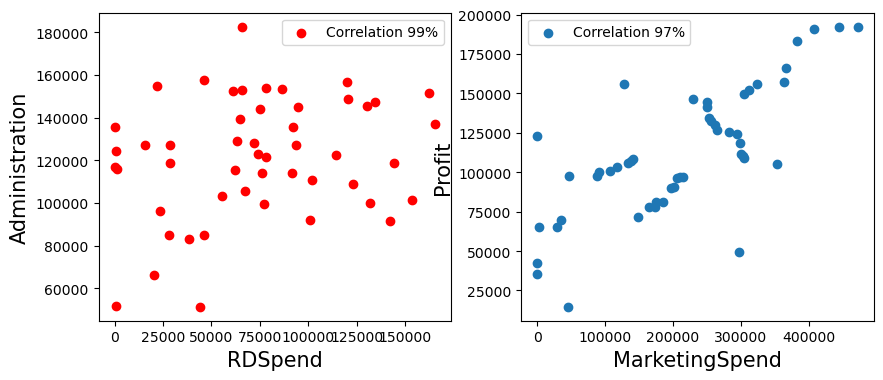

In [5]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(df["RDSpend"],df["Administration"],color="red",label="Correlation 99%")
plt.xlabel("RDSpend",size=15)
plt.ylabel("Administration",size=15)
plt.legend(loc="best")

plt.subplot(1,2,2)
plt.scatter(df["MarketingSpend"],df["Profit"],label="Correlation 97%")
plt.xlabel("MarketingSpend",size=15)
plt.ylabel("Profit",size=15)
plt.legend(loc="best")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RDSpend         50 non-null     float64
 1   Administration  50 non-null     float64
 2   MarketingSpend  50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
df.isna().sum()

RDSpend           0
Administration    0
MarketingSpend    0
State             0
Profit            0
dtype: int64

<AxesSubplot:>

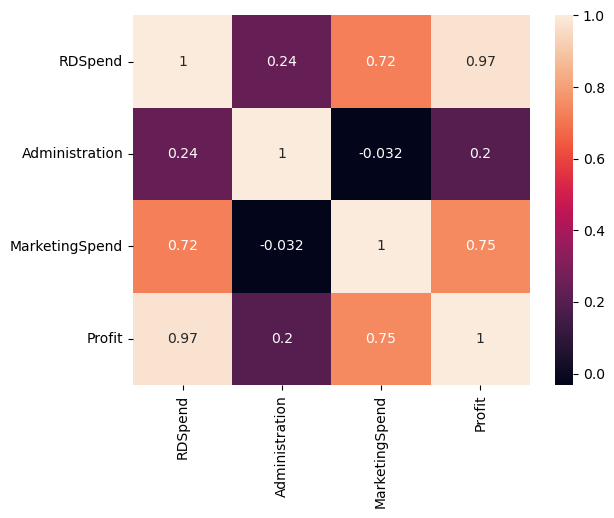

In [8]:
sns.heatmap(df.corr(),annot=True)

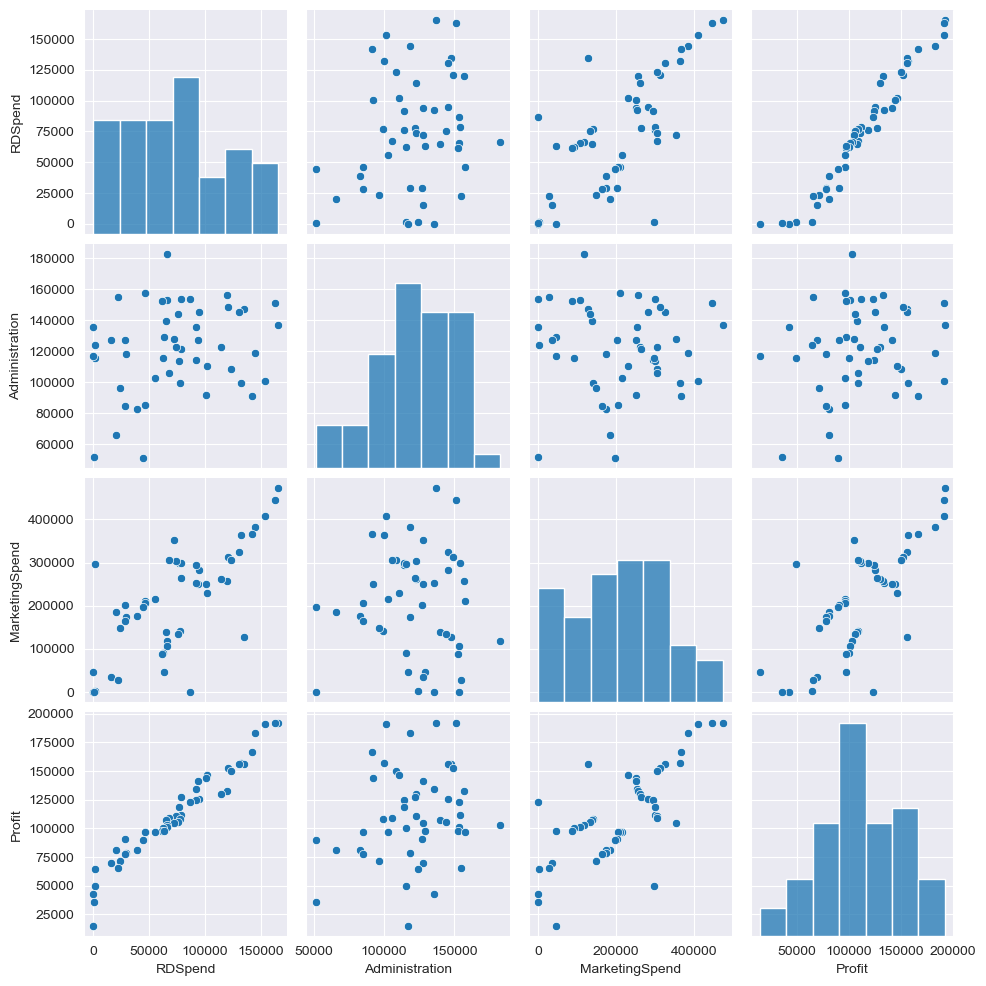

In [9]:
sns.set_style(style='darkgrid')
sns.pairplot(df)

# Preparing Stats model for MLR

In [10]:
import statsmodels.formula.api as smf 
df1 = smf.ols('Profit~RDSpend+Administration+MarketingSpend',data=df).fit()

In [11]:
df1.rsquared

0.9507459940683246

In [12]:
df1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           4.53e-30
Time:                        12:00:28   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDSpend            0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
MarketingSpend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# VIF CALCULATION

In [13]:
rqs_rds = smf.ols("RDSpend~Administration+MarketingSpend",data=df).fit().rsquared
vif_rds = 1/(1-rqs_rds)

In [14]:
rqs_adm = smf.ols("Administration~RDSpend+MarketingSpend",data=df).fit().rsquared
vif_adm = 1/(1-rqs_adm)

In [15]:
rqs_mar = smf.ols("MarketingSpend~RDSpend+Administration",data=df).fit().rsquared
vif_mar = 1/(1-rqs_mar)

In [16]:
d1 = {'variables':['RDSpend','Administration','MarketingSpend'],
     'VIf':[vif_rds,vif_adm,vif_mar]
     }
vif_frame=pd.DataFrame(d1)
vif_frame

,variables,VIf
0,RDSpend,2.468903
1,Administration,1.175091
2,MarketingSpend,2.326773


# Normality of Residuals

In [17]:
import statsmodels.api as sm

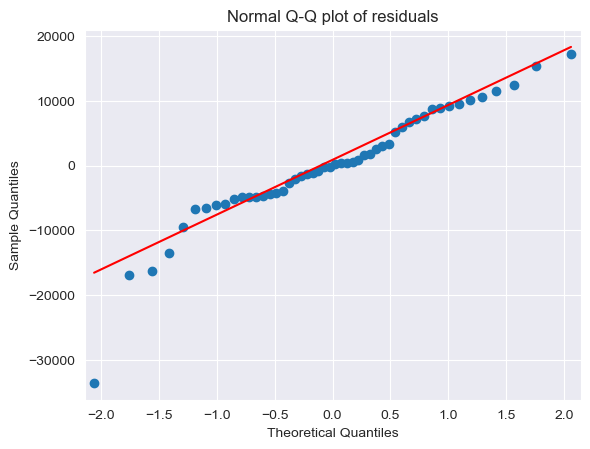

In [18]:
qqplot = sm.qqplot(df1.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

# Residual plot for homoscedasticity

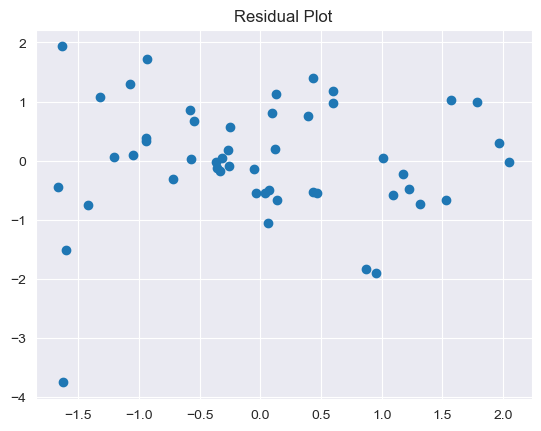

In [19]:
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()

plt.scatter(get_standardized_values(df1.fittedvalues),
            get_standardized_values(df1.resid))
plt.title("Residual Plot")
plt.show()

# Residual VS Regressors

eval_env: 1


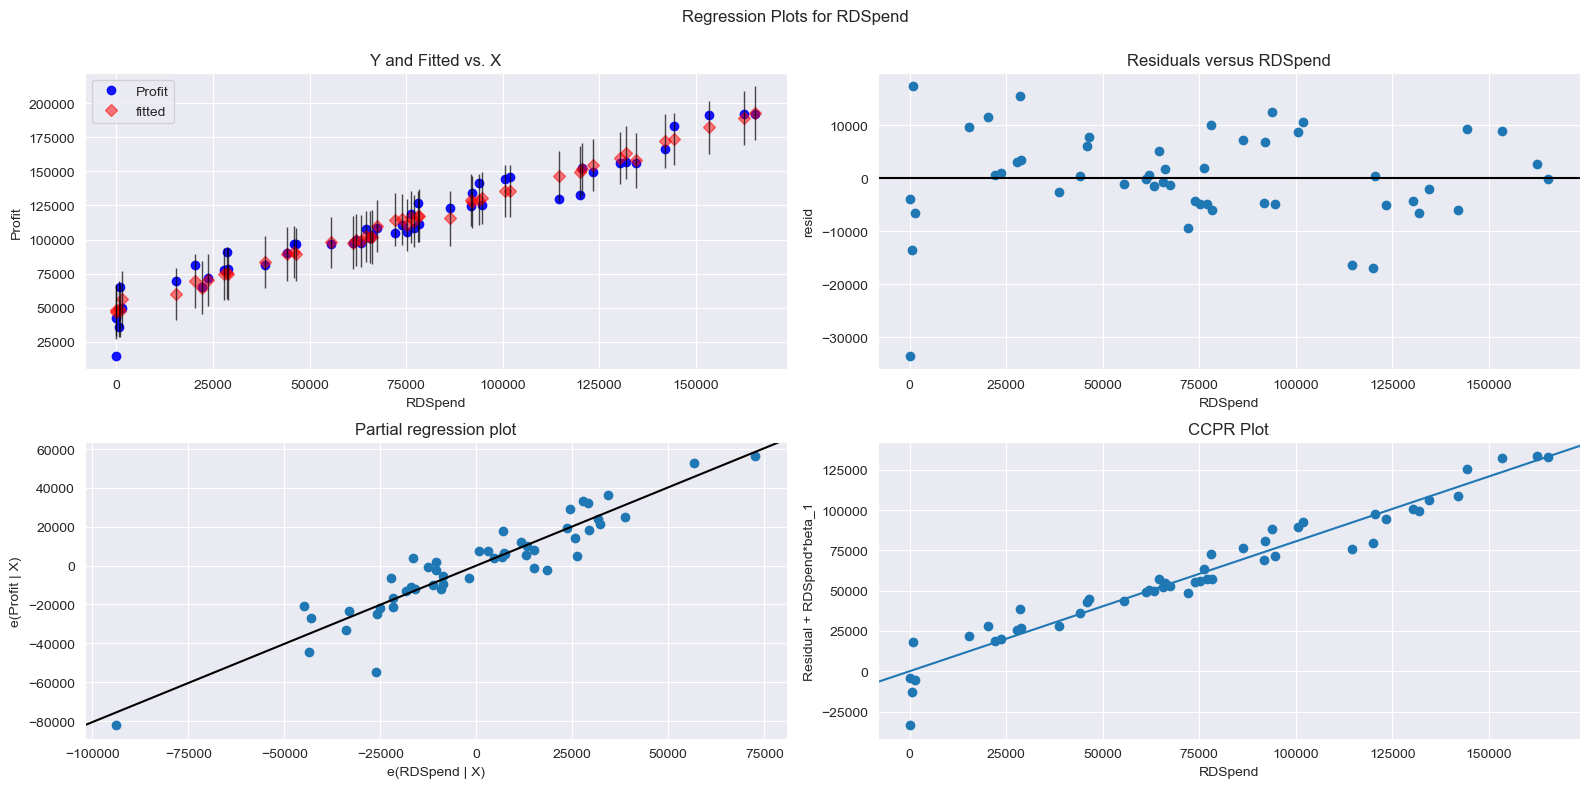

In [20]:
fig = plt.figure(figsize=(16,8))
sm.graphics.plot_regress_exog(df1,"RDSpend",fig=fig)
plt.show()

eval_env: 1


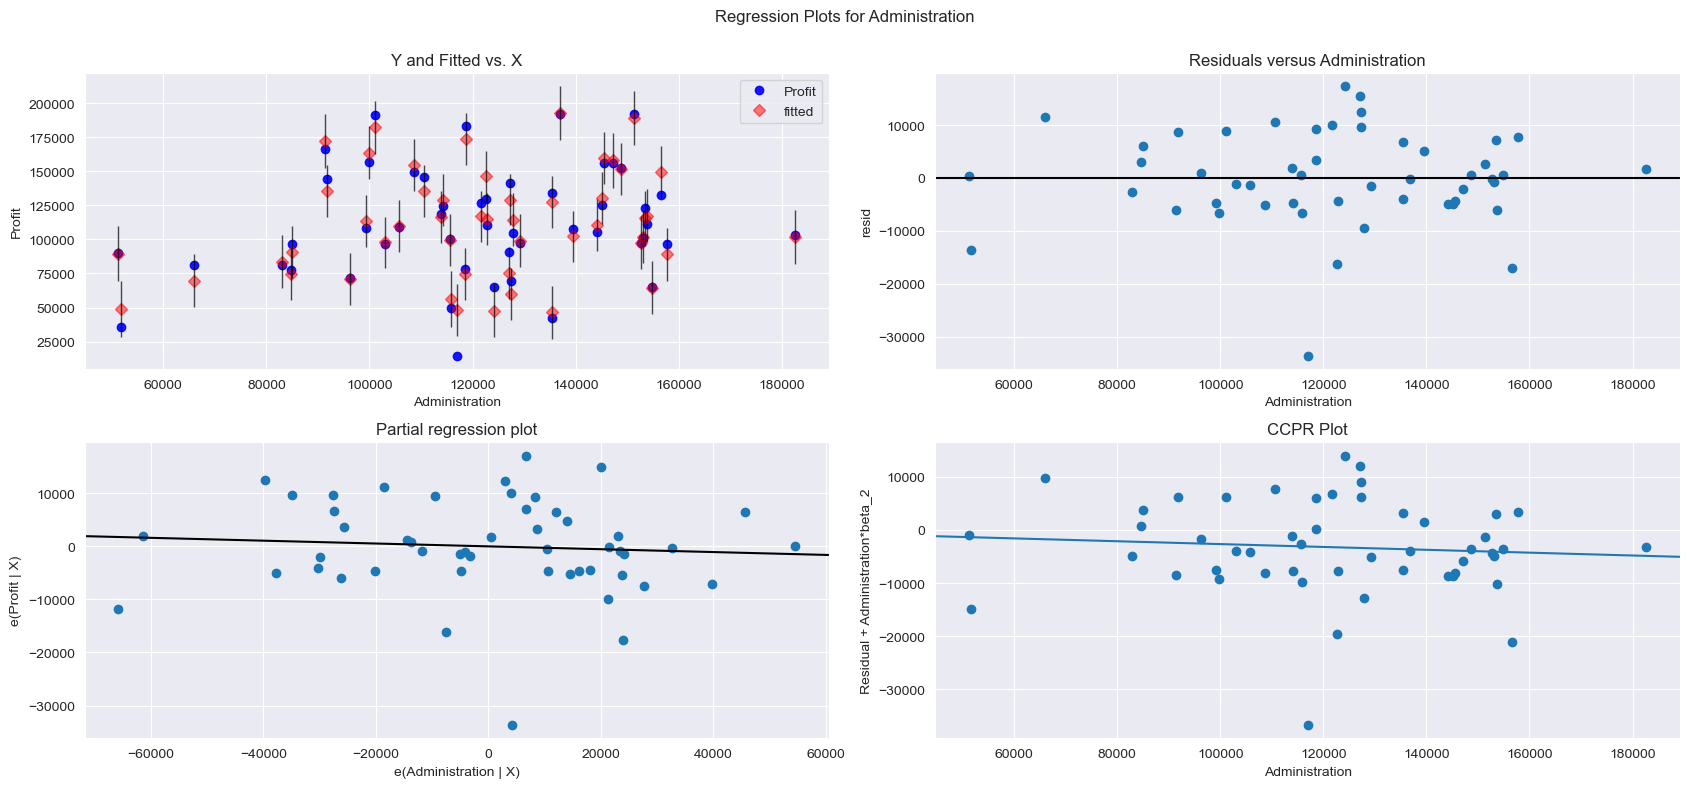

In [21]:
fig = plt.figure(figsize=(17,8))
sm.graphics.plot_regress_exog(df1,"Administration",fig=fig)
plt.show()

eval_env: 1


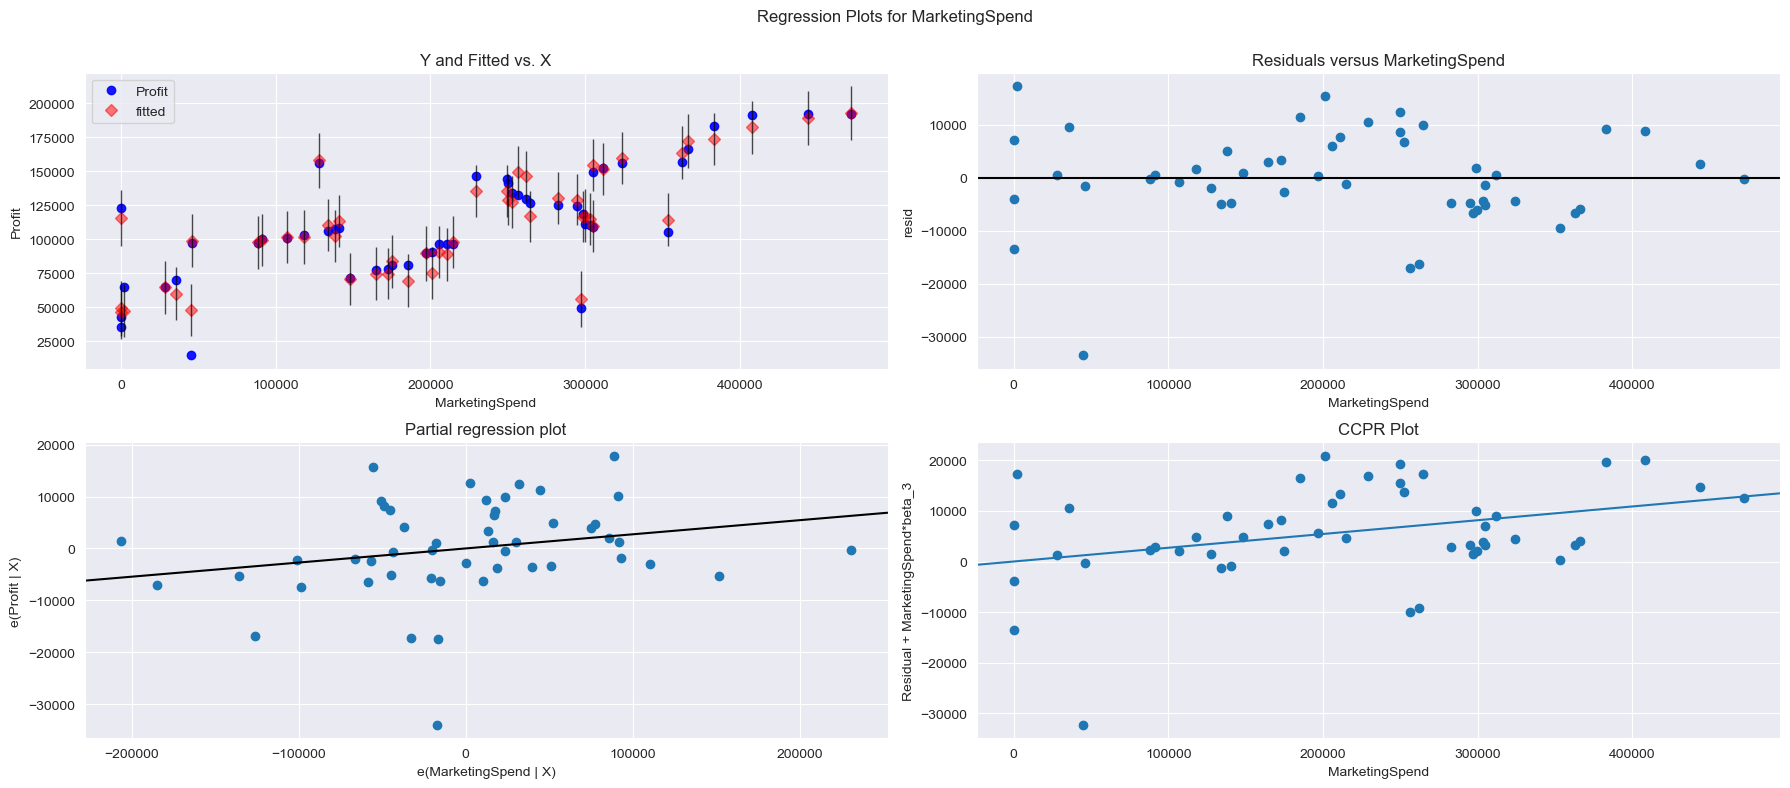

In [22]:
fig = plt.figure(figsize=(18,8))
sm.graphics.plot_regress_exog(df1,"MarketingSpend",fig=fig)
plt.show()

# Cook's Distance

In [23]:
df1_influence=df1.get_influence()
(c,_)=df1_influence.cooks_distance
k=3
n=50
3*(k+1)/n


0.24

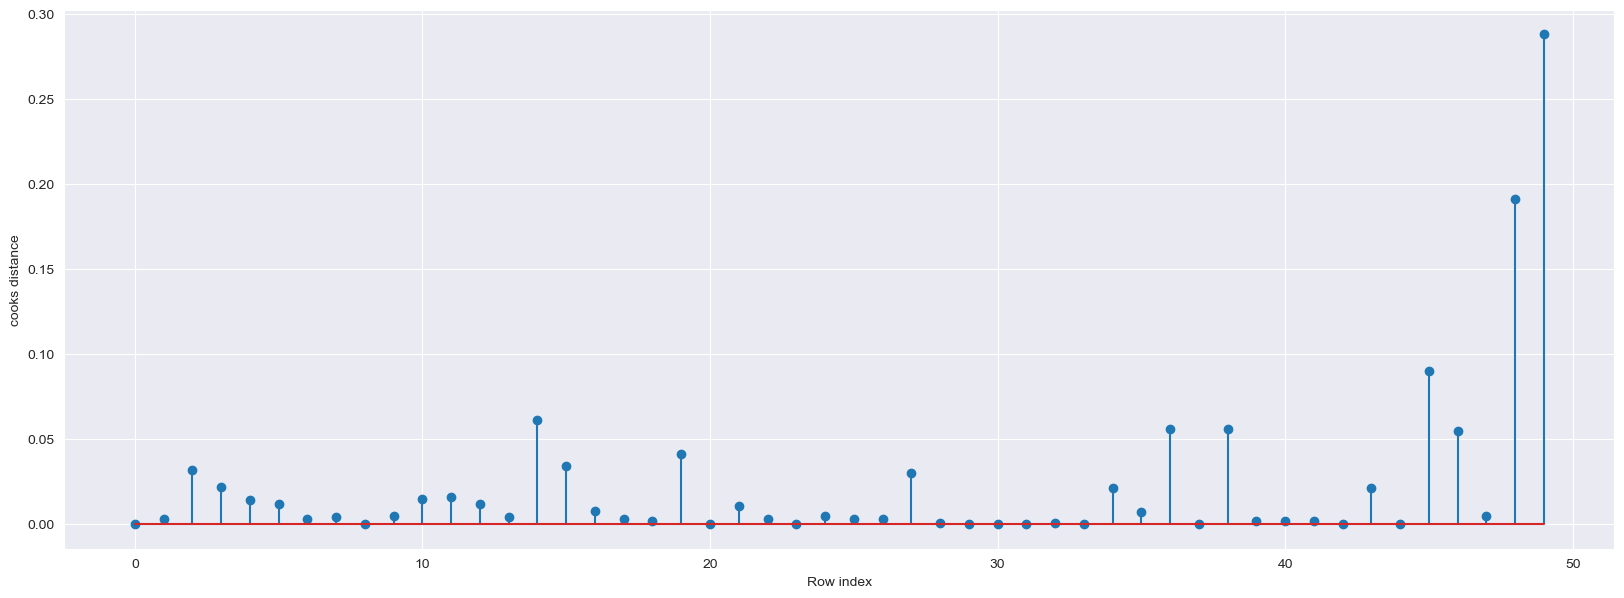

In [24]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('cooks distance')
plt.show()

In [25]:
np.where(c>0.24)

(array([49], dtype=int64),)

In [26]:
df2 = pd.read_csv("50_Startups.csv")

In [27]:
df2

,RDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [28]:
df3=df2.drop(df2.index[49],axis=0).reset_index()

In [29]:
df3 = df3.drop(['index'],axis=1)
df3

,RDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Build Model

In [30]:
f_df = smf.ols('Profit~RDSpend+Administration+MarketingSpend',data=df3).fit()

In [31]:
f_df.rsquared,f_df.aic

(0.9613162435129847, 1020.5652974526367)

In [32]:
f_df.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           8.85e-32
Time:                        12:00:33   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RDSpend            0.7830      0.038     20.470      0.000       0.706       0.860
Administration    -0.0222      0.043     -0.518      0.607      -0.109       0.064
MarketingSpend     0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
f_df.predict(df3[["RDSpend","Administration","MarketingSpend"]])

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64